In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.rc = {'figure.figsize': (10,6)}
%matplotlib inline

## Calculate mesh quality metrics

This notebook reads a mesh and plots different quality indicators:

- Minimum/maximum angle
- Ratio min/max edge length
- Ratio circumscribed to inscribed circle (largest circle fitting inside vs smallest circle fitting around a triangle)

The indicators are plotted on the mesh and as a histogram.

You can use your own mesh by supplying it to `MeshContainer.read()`.

In [2]:
from nanomesh import metrics
from nanomesh import MeshContainer

<AxesSubplot:title={'center':'triangle mesh'}>

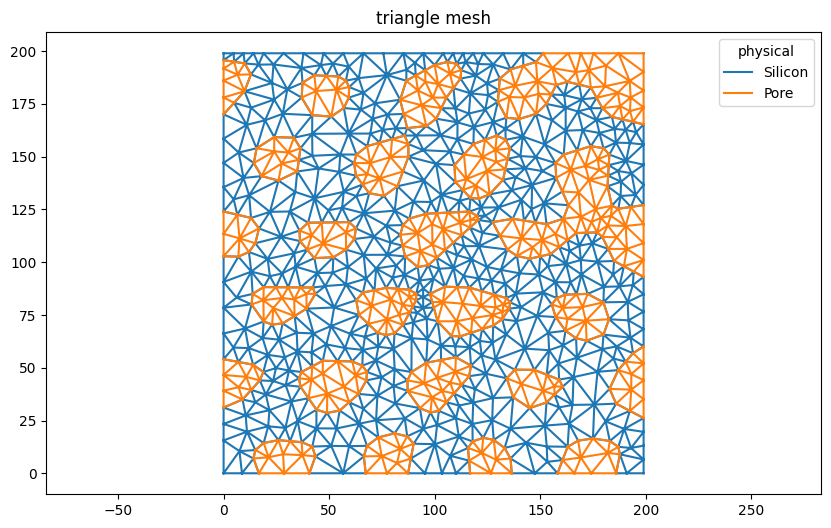

In [3]:
mesh = MeshContainer.read('out.msh')
triangle_mesh = mesh.get('triangle')

triangle_mesh.plot()

### Metrics

Quality metrics are available through the `metrics` submodule, for example to access the area for each face:

In [4]:
metrics.area(triangle_mesh)

array([39.65259243, 45.70571101, 17.81927029, ..., 38.98781136,
       43.35816492, 41.13174034])

### Minumum and maximum cell angles

`nanomesh.metrics` includes convenience functions for plotting histograms and colored 2d meshes. The `ax` object can be re-used to overlay the mesh triangles.

<AxesSubplot:title={'center':'triangle mesh'}>

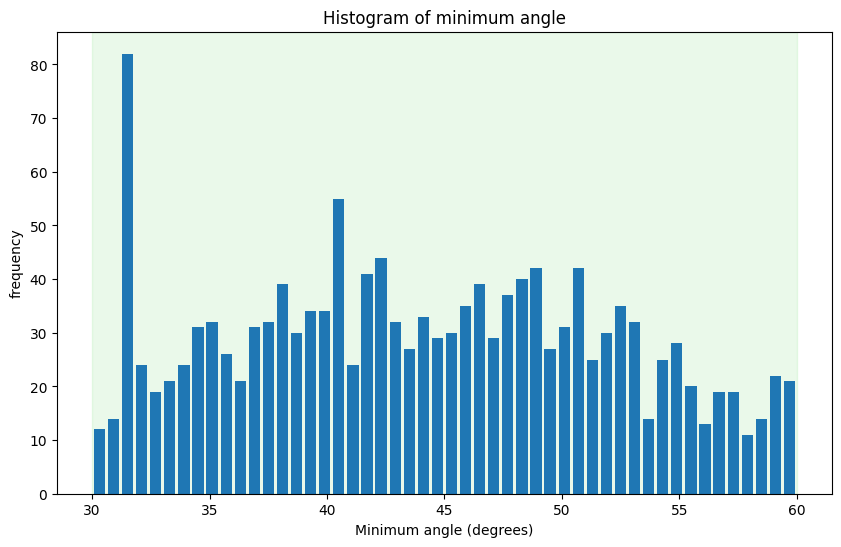

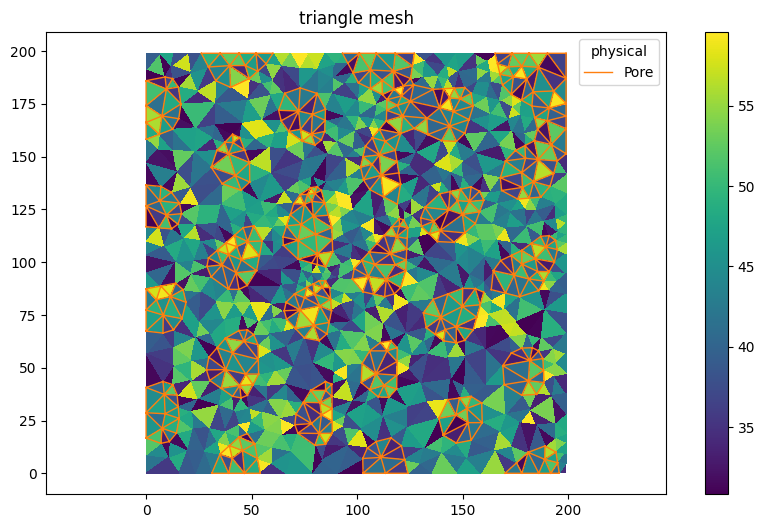

In [5]:
plot_kwargs = {
    'linewidth': 1,
    'show_labels': ('Pore', ),
    'colors': ('tab:orange', ),
    'flip_xy': False,
    'legend': 'all',
}

metrics.histogram(triangle_mesh, metric='min_angle')
ax = metrics.plot2d(triangle_mesh, metric='min_angle')
triangle_mesh.plot_mpl(ax, **plot_kwargs)

<AxesSubplot:title={'center':'triangle mesh'}>

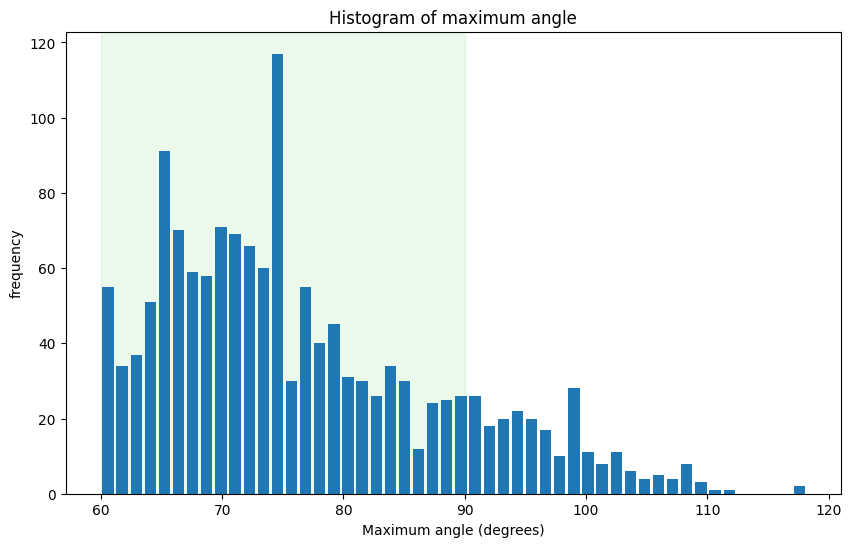

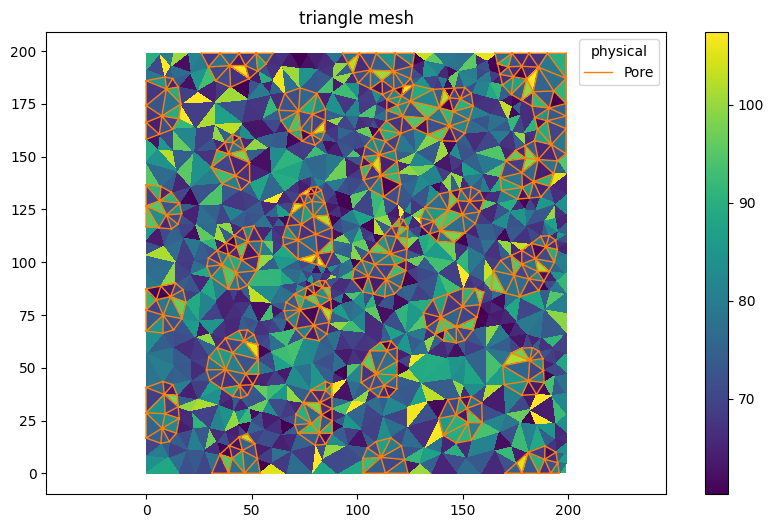

In [6]:
metrics.histogram(triangle_mesh, metric='max_angle')
ax = metrics.plot2d(triangle_mesh, metric='max_angle')
triangle_mesh.plot_mpl(ax, **plot_kwargs)

### Ratio between radii

Another useful metric is the ratio between the inner and outer radius. For more info, see this [link](https://www.geogebra.org/m/VRE3Dyrn).

<AxesSubplot:title={'center':'triangle mesh'}>

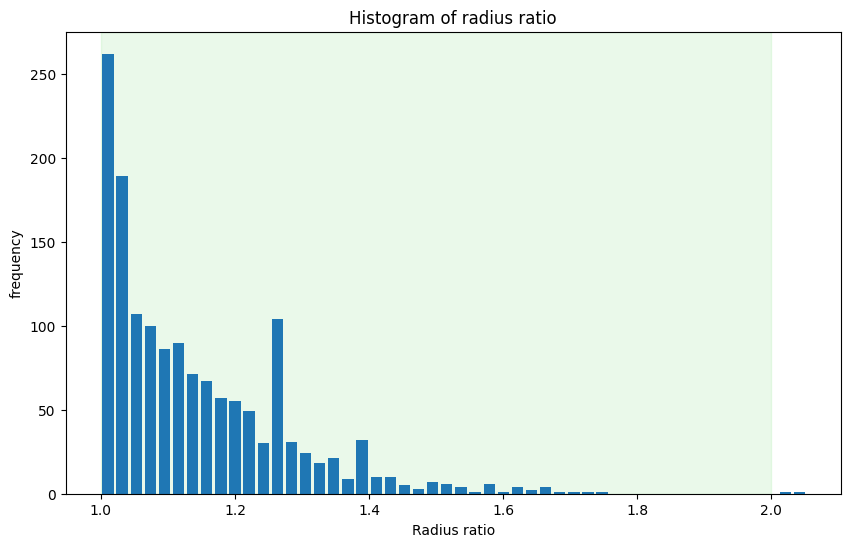

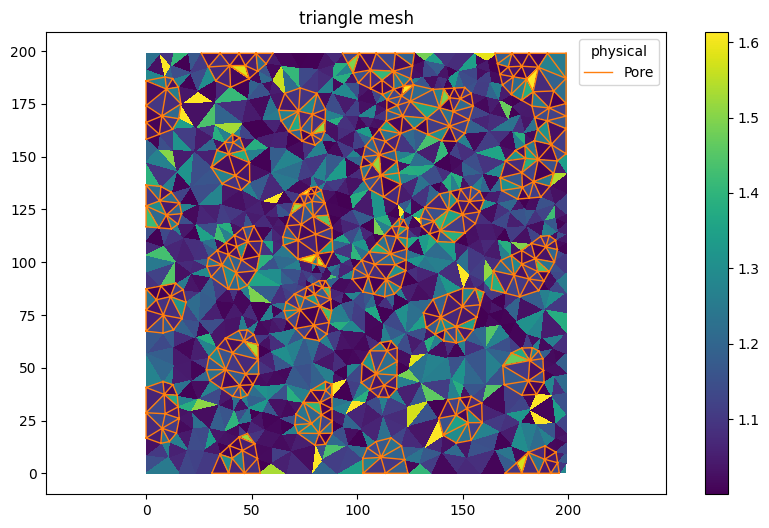

In [7]:
metrics.histogram(triangle_mesh, metric='radius_ratio')
ax = metrics.plot2d(triangle_mesh, metric='radius_ratio')
triangle_mesh.plot_mpl(ax, **plot_kwargs)

### Ratio between longest and shortest edge

<AxesSubplot:title={'center':'triangle mesh'}>

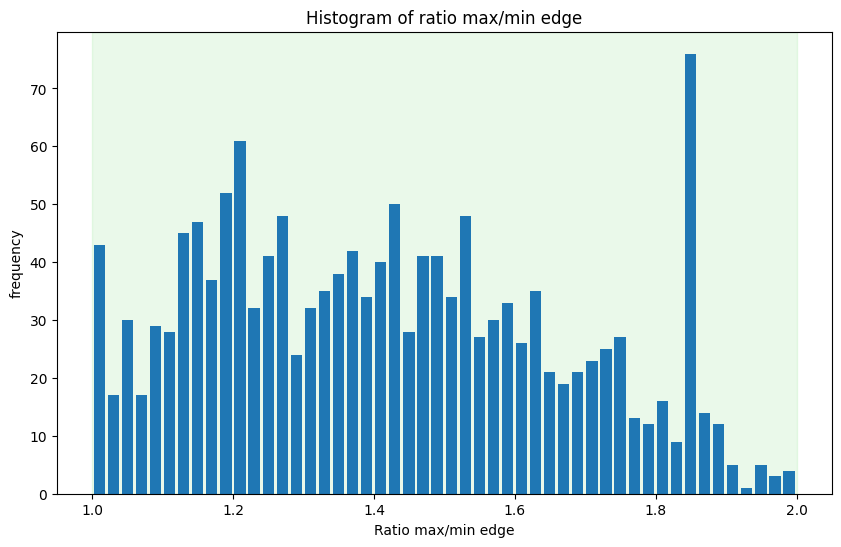

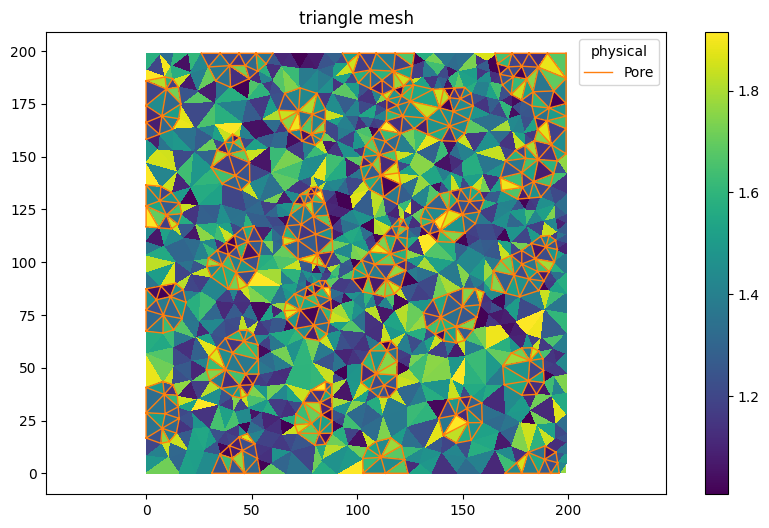

In [8]:
metrics.histogram(triangle_mesh, metric='max_min_edge_ratio')
ax = metrics.plot2d(triangle_mesh, metric='max_min_edge_ratio')
triangle_mesh.plot_mpl(ax, **plot_kwargs)

### Calculate and export all metrics

This way they can be viewed in another program like Paraview.

In [9]:
metrics.calculate_all_metrics(triangle_mesh, inplace=True)
triangle_mesh.write("mesh_quality.msh", file_format='gmsh22', binary=False)

Warning: Appending zeros to replace the missing physical tag data.

Warning: Appending zeros to replace the missing geometrical tag data.